In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

input_file = "ds_salaries.csv"
data = pd.read_csv(input_file, header = 0)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


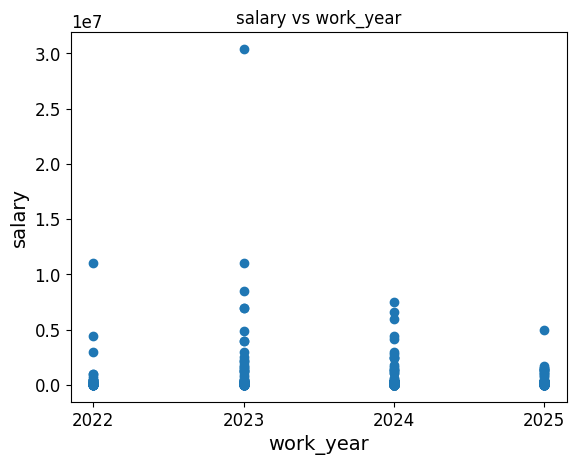

In [13]:
import matplotlib.pyplot as plt

# Create a scatter plot of YearsExperience vs Salary
plt.scatter(data['work_year'], data['salary'])

# Add labels and title to the plot
plt.xticks(range(int(min(data['work_year'])), int(max(data['work_year']))+1, 1))

plt.xlabel('work_year')
plt.ylabel('salary')
plt.title('salary vs work_year')

# Show the plot
plt.show()

Saving figure attribute_histogram_plots


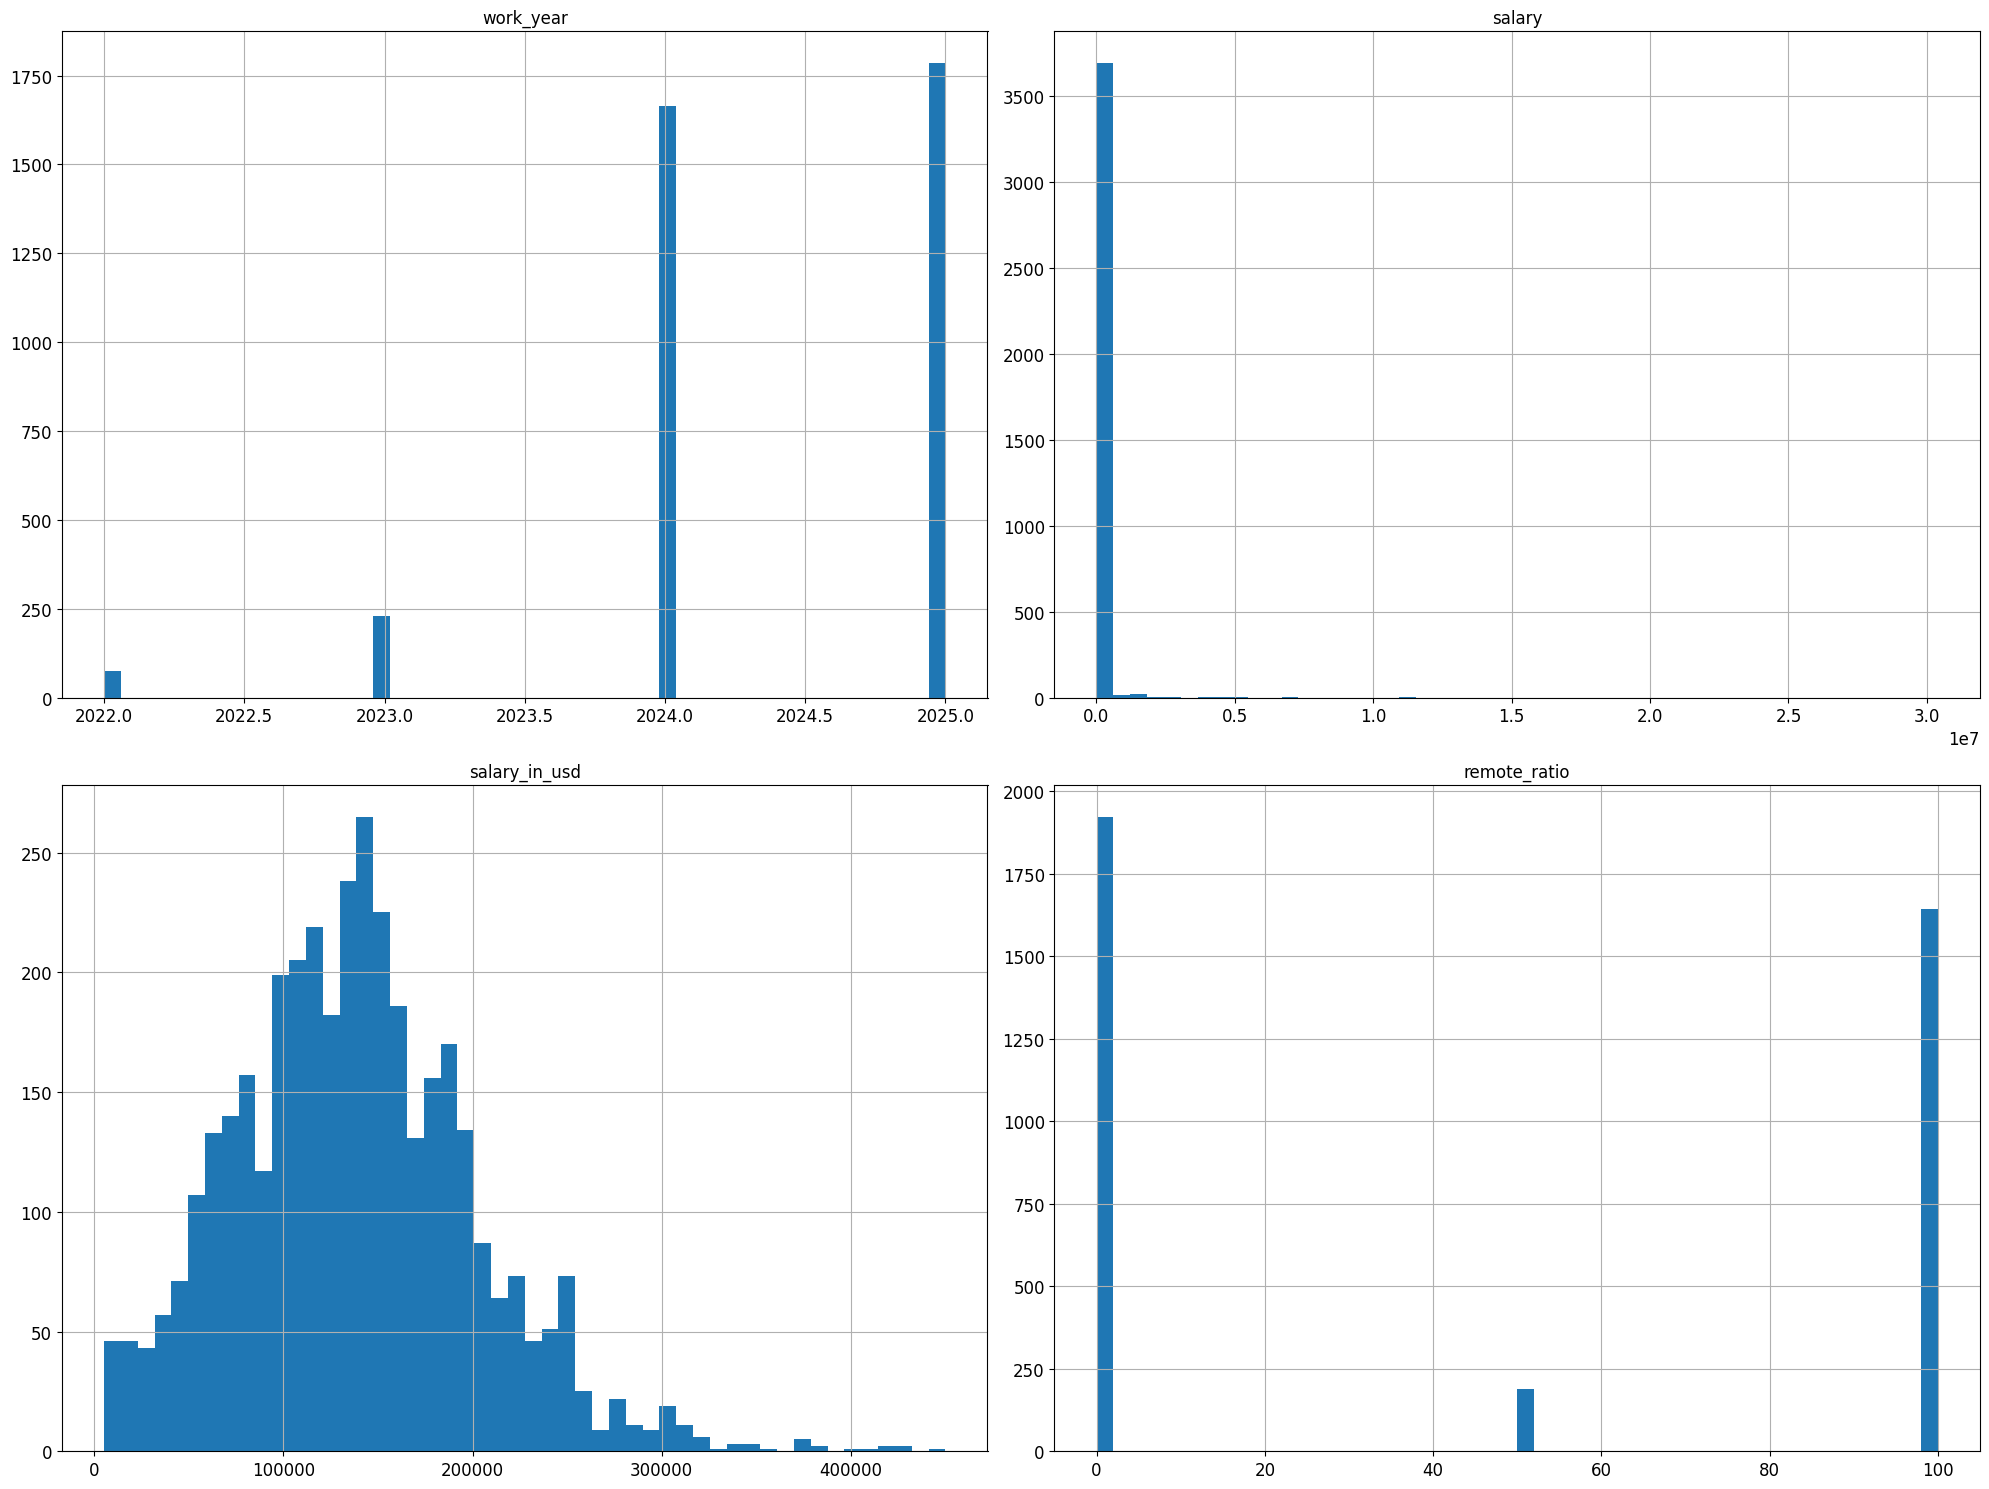

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")

plt.show()

# Clean up the set
Here we will first drop the unuseful columns: salary, salary_currency (both covered by salary_in_usd).

In [34]:
data.drop(columns=['salary', 'salary_currency'], inplace=True)
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2126,2024,SE,FT,Data Specialist,110000,US,0,US,M
19,2025,MI,FT,Data Analyst,150000,US,100,US,M
351,2025,SE,FT,Data Engineer,147000,US,0,US,M
3211,2024,MI,FT,Data Engineer,73880,GB,100,GB,M
2616,2024,SE,FT,Data Analyst,169000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
1172,2025,SE,FT,Data Engineer,109400,US,0,US,M
1066,2025,SE,FT,Data Engineer,265000,US,0,US,M
1664,2025,SE,FT,Data Architect,115000,US,100,US,M
3327,2024,SE,FT,Data Scientist,140400,US,0,US,M


#### We will check if there are any missing values in our columns

In [ ]:
#check for missing values

columns_with_miss = data.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

# Test set

In [18]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratify by experience level since that is one of the most important attributes
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["experience_level"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [27]:
#check distribution of train and test
strat_test_set["experience_level"].value_counts() / len(strat_test_set)

SE    0.669774
MI    0.214381
EN    0.085220
EX    0.030626
Name: experience_level, dtype: float64

In [26]:
strat_train_set["experience_level"].value_counts() / len(strat_train_set)

SE    0.670107
MI    0.214381
EN    0.085220
EX    0.030293
Name: experience_level, dtype: float64

In [28]:
def income_cat_proportions(data):
    return data["experience_level"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
EN,0.085220,0.085220,0.089214,4.687500,0.000000
EX,0.030360,0.030626,0.030626,0.877193,0.877193
MI,0.214381,0.214381,0.209055,-2.484472,0.000000
SE,0.670040,0.669774,0.671105,0.158983,-0.039746


In [35]:
#cautam corelatia dintre salariu si restul atributelor
data = strat_train_set.copy()
corr_matrix = data.corr()
corr_matrix["salary"].sort_values(ascending=False)

Columns with missing values: 0


C:\Users\rober\AppData\Local\Temp\ipykernel_22432\4011751491.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Series([], dtype: int64)